# Tugas Besar ML - Unsupervised Learning (K-Means)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(15)

In [3]:
df = pd.read_csv('factbook.csv')
df.head()

,Country,Area,Birth rate,Current account balance,Death rate,Electricity consumption,Electricity production,Exports,GDP,GDP per capita,...,Life expectancy at birth,Military expenditures,Natural gas consumption,Oil consumption,Population,Public debt,Railways,Reserves of foreign exchange & gold,Total fertility rate,Unemployment rate
0,Albania,28748,15.08,504000000,5.12,6760000000,5680000000,552400000,17460000000,4900,...,77.24,1.49,3.000000e+07,7500,3563112,NaN,447.0,1.206000e+09,2.04,14.8
1,Algeria,2381740,17.13,11900000000,4.60,23610000000,25760000000,32160000000,212300000000,6600,...,73.00,3.20,2.232000e+10,209000,32531853,37.4,3973.0,4.355000e+10,1.92,25.4
2,Angola,1246700,44.64,37880000,25.90,1587000000,1707000000,12760000000,23170000000,2100,...,36.61,10.60,5.300000e+08,31000,11190786,NaN,2761.0,8.000000e+08,6.27,NaN
3,Argentina,2766890,16.90,5473000000,7.56,81650000000,81390000000,33780000000,483500000000,12400,...,75.91,1.30,3.110000e+10,486000,39537943,118.0,34091.0,1.947000e+10,2.19,14.8
4,Armenia,29800,11.76,240400000,8.16,5797000000,6492000000,850000000,13650000000,4600,...,71.55,6.50,1.400000e+09,5700,2982904,NaN,845.0,5.550000e+08,1.32,30.0


In [4]:
ATRIBUT = ['Exports','Imports','Industrial production growth rate','Investment','Unemployment rate']
data = df[ATRIBUT]
data = data.dropna()
for i in ATRIBUT:
    mean = data[i].mean()
    std = data[i].std()
    # delete outlier
    z = (data[i] - mean)/std
    data = data.drop(z[z > 3].index)
    data = data.drop(z[z < -3].index)

for i in ATRIBUT:
    data[i] = (data[i]-data[i].min())/(data[i].max()-data[i].min())
data.head()

,Exports,Imports,Industrial production growth rate,Investment,Unemployment rate
0,0.001594,0.006029,0.300000,0.311377,0.274227
1,0.101761,0.053850,0.407407,0.544910,0.492784
3,0.106895,0.078570,0.629630,0.308383,0.274227
4,0.002537,0.003212,0.740741,0.353293,0.587629
5,0.275204,0.354592,0.255556,0.517964,0.074227


In [5]:
def k_point(data, k):
    """Memilih titik sebanyak k sebagai Centroid awal"""
    centers = []
    rand = np.random.randint(0, len(data), k)
    x = data.columns
    x = x.drop('cluster')
    for i in range(k):
        center = dict()
        for j in x:
            center[j] = data.iloc[rand[i]][j]
        centers.append(center)
    
    return centers

def euclidean_distance(x, y):
    """Menghitung jarak euclidean antara dua titik"""
    distance = 0
    for i in y.keys():
        distance += (x[i] - y[i])**2
    return np.sqrt(distance)

def set_cluster(data, centers):
    '''masukkan data ke cluster terdekat'''
    x = data.columns
    x = x.drop('cluster')
    cluster = []
    for i in range(len(data)):
        distance = []
        for j in centers:
            distance.append(euclidean_distance(data.iloc[i][x].to_dict(), j))
        cluster.append(distance.index(min(distance)))
    return cluster

def new_centroid(data):
    centers = []
    h = data.groupby('cluster')
    for i in h:
        center = dict()
        for j in i[1].columns:
            if j != 'cluster':
                center[j] = i[1][j].mean()
        centers.append(center)
        
    return centers
    
def k_means(data, k):
    '''
        Algoritma k-means
        data: dataframe
        k: jumlah cluster
    '''
    data_clustering = data.copy()
    data_clustering['cluster'] = 0
    centroid = k_point(data_clustering, k)
    i = 0
    while True:
        data_clustering['cluster'] = set_cluster(data_clustering, centroid)
        prev_centroid = centroid
        centroid = new_centroid(data_clustering)
        if prev_centroid == centroid:
            break
        i += 1
    return data_clustering, centroid
        

In [6]:
# function of Sum Squared Error
def sum_squared_error(data, centroid):
    x = data.columns
    x = x.drop('cluster')
    sse = 0
    for i in range(len(data)):
        sse += euclidean_distance(data.iloc[i][x].to_dict(), centroid[int(data.iloc[i]['cluster'])])
    return sse

In [7]:
list_cluster = []
list_sse = []
for i in range(2,12):
    data_baru , centroid = k_means(data, i)
    sse = sum_squared_error(data_baru, centroid)
    print('Jumlah Cluster: {}, SSE: {}'.format(i, sse))
    list_cluster.append(i)
    list_sse.append(sse)

Jumlah Cluster: 2, SSE: 34.57844922336837
Jumlah Cluster: 3, SSE: 30.024973521081456
Jumlah Cluster: 4, SSE: 27.47590360044607
Jumlah Cluster: 5, SSE: 24.31743589596895
Jumlah Cluster: 6, SSE: 23.371018995621288
Jumlah Cluster: 7, SSE: 21.495219910009123
Jumlah Cluster: 8, SSE: 21.063461081250754
Jumlah Cluster: 9, SSE: 21.03525940626469
Jumlah Cluster: 10, SSE: 20.092620469859547
Jumlah Cluster: 11, SSE: 19.9334303876695


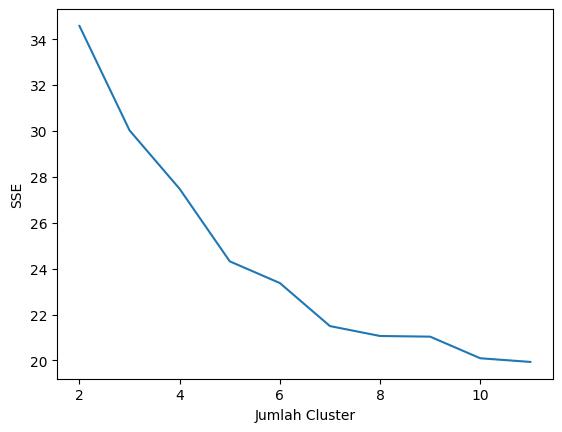

In [8]:
plt.plot(list_cluster, list_sse)
plt.xlabel('Jumlah Cluster')
plt.ylabel('SSE')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=235d0884-4c38-4643-a5a3-913675ab1d49' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>